In [1]:
import polars as pl
import pandas as pd

# Load the dataset
file_path = 'flights.csv'  # Replace with the actual path to your CSV file
flights_df = pl.read_csv(file_path)

# Display the shape and columns of the DataFrame
print("Dataset Shape:", flights_df.shape)
print("Column Names:", flights_df.columns)


Dataset Shape: (5819079, 31)
Column Names: ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [2]:
# Display the first few rows of the dataset
print(flights_df.head())

# Check for missing values
missing_values = flights_df.select(pl.all().is_null().sum())
print("Missing Values:\n", missing_values)

# Descriptive statistics
print(flights_df.describe())

shape: (5, 31)
┌──────┬───────┬─────┬─────────────┬───┬────────────────┬───────────────┬─────────────────────┬───────────────┐
│ YEAR ┆ MONTH ┆ DAY ┆ DAY_OF_WEEK ┆ … ┆ SECURITY_DELAY ┆ AIRLINE_DELAY ┆ LATE_AIRCRAFT_DELAY ┆ WEATHER_DELAY │
│ ---  ┆ ---   ┆ --- ┆ ---         ┆   ┆ ---            ┆ ---           ┆ ---                 ┆ ---           │
│ i64  ┆ i64   ┆ i64 ┆ i64         ┆   ┆ i64            ┆ i64           ┆ i64                 ┆ i64           │
╞══════╪═══════╪═════╪═════════════╪═══╪════════════════╪═══════════════╪═════════════════════╪═══════════════╡
│ 2015 ┆ 1     ┆ 1   ┆ 4           ┆ … ┆ null           ┆ null          ┆ null                ┆ null          │
│ 2015 ┆ 1     ┆ 1   ┆ 4           ┆ … ┆ null           ┆ null          ┆ null                ┆ null          │
│ 2015 ┆ 1     ┆ 1   ┆ 4           ┆ … ┆ null           ┆ null          ┆ null                ┆ null          │
│ 2015 ┆ 1     ┆ 1   ┆ 4           ┆ … ┆ null           ┆ null          ┆ null           

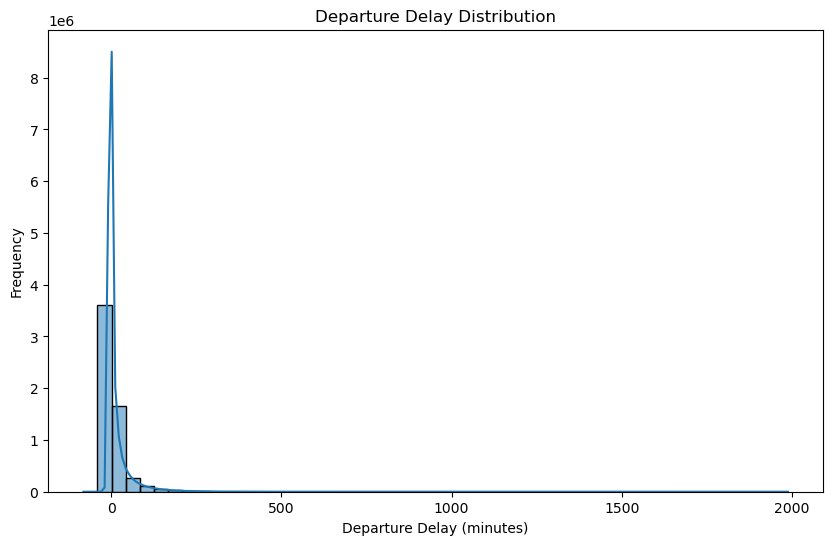

In [3]:
# Plotting the distribution of departure delays
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Polars DataFrame to Pandas for plotting
flights_pd = flights_df.to_pandas()

# Plot departure delay distribution
plt.figure(figsize=(10, 6))
sns.histplot(flights_pd['DEPARTURE_DELAY'].dropna(), bins=50, kde=True)
plt.title('Departure Delay Distribution')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

In [4]:
import duckdb

# Create a DuckDB connection
con = duckdb.connect(database=':memory:')

# Load the data into DuckDB
con.execute("CREATE TABLE flights AS SELECT * FROM flights_pd")

# Run a sample SQL query to find average departure delay
avg_delay_query = con.execute("SELECT AVG(DEPARTURE_DELAY) AS avg_departure_delay FROM flights").fetchdf()
print(avg_delay_query)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

   avg_departure_delay
0             9.370158


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data for modeling
features = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'DISTANCE']
X = flights_pd[features].fillna(0)  # Fill missing values
y = flights_pd['DEPARTURE_DELAY'].fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)



Mean Squared Error: 1366.9719196532167
Mean Absolute Error: 18.543882632076194


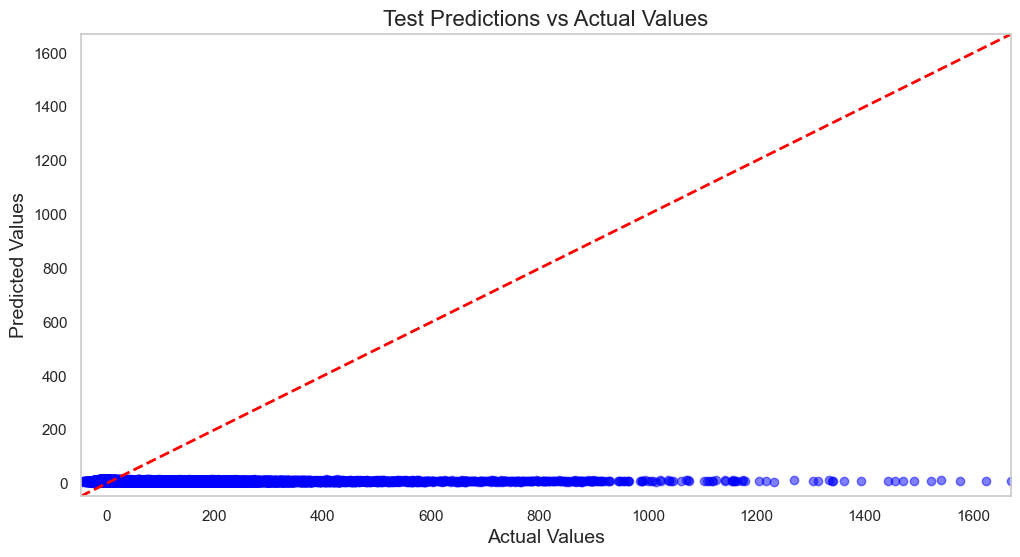

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')

# Plotting the line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')

# Adding labels and title
plt.title('Test Predictions vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()

# Show plot
plt.show()


In [7]:
import duckdb

# Create a DuckDB connection
con = duckdb.connect(database=':memory:')

# Load the data into DuckDB
con.execute("CREATE TABLE flights AS SELECT * FROM flights_pd")

# Run a sample SQL query to find average departure delay
avg_delay_query = con.execute("SELECT AVG(DEPARTURE_DELAY) AS avg_departure_delay FROM flights").fetchdf()
print(avg_delay_query)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

   avg_departure_delay
0             9.370158
